In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
import math

# Import Data

In [2]:
train = pd.read_csv("/Users/irenewalken/Documents/GitHub/Airline-Passenger-Satisfaction-Machine_learning-/Data/train.csv")
test = pd.read_csv("/Users/irenewalken/Documents/GitHub/Airline-Passenger-Satisfaction-Machine_learning-/Data/test.csv")
data = pd.concat([train, test])
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


# Data cleaning

**Drop unused columns**

In [3]:
data = data.drop(["Unnamed: 0"], axis = 1)
data = data.drop(["id"], axis = 1)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


**Check the data types**

In [4]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

**Check if we have NaN values**

In [5]:
data.isnull().sum().sum()

393

In [6]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [7]:
data.shape

(129880, 23)

**Drop rows with Nan value**

In [8]:
data = data.dropna()

In [9]:
data.shape

(129487, 23)

In [10]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Divide data on numerical and categorical**

In [11]:
data_numerical = data.select_dtypes(include=np.number, exclude=np.object)#get numerical data
data_categorical = data.select_dtypes(include=np.object, exclude=np.number)#get categorical data


In [12]:
data_categorical

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
25972,Male,Loyal Customer,Business travel,Business,satisfied
25973,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
25974,Male,Loyal Customer,Business travel,Business,satisfied


# Encoding categorical data

In [13]:
data_categorical["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [14]:
data_categorical["Class"] = data_categorical["Class"].replace(["Business", "Eco Plus", "Eco"], [3,2,1])
data_categorical["satisfaction"] = data_categorical["satisfaction"].replace(["neutral or dissatisfied", "satisfied"], [0,1])

In [15]:
data_categorical["Class"].unique()

array([2, 3, 1])

In [16]:
data_categorical

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,2,0
1,Male,disloyal Customer,Business travel,3,0
2,Female,Loyal Customer,Business travel,3,1
3,Female,Loyal Customer,Business travel,3,0
4,Male,Loyal Customer,Business travel,3,1
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,3,0
25972,Male,Loyal Customer,Business travel,3,1
25973,Female,Loyal Customer,Personal Travel,1,0
25974,Male,Loyal Customer,Business travel,3,1


In [17]:
data_categorical["Class"].value_counts()

3    61990
1    58117
2     9380
Name: Class, dtype: int64

In [18]:
X = data_categorical.drop(["Class", "satisfaction"],axis =1)
X

,Gender,Customer Type,Type of Travel
0,Male,Loyal Customer,Personal Travel
1,Male,disloyal Customer,Business travel
2,Female,Loyal Customer,Business travel
3,Female,Loyal Customer,Business travel
4,Male,Loyal Customer,Business travel
...,...,...,...
25971,Male,disloyal Customer,Business travel
25972,Male,Loyal Customer,Business travel
25973,Female,Loyal Customer,Personal Travel
25974,Male,Loyal Customer,Business travel


In [19]:
X_features=pd.get_dummies(X, drop_first=True).astype(np.int64) # One hot
X_features

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,0,1
1,1,1,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
25971,1,1,0
25972,1,0,0
25973,0,0,1
25974,1,0,0


In [20]:
total = pd.concat([data_numerical, X_features], axis=1)
total

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,1,1,0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,0,0
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,0,1
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,0,0


In [21]:
total["Class"] = data_categorical["Class"]
total["satisfaction"] = data_categorical["satisfaction"]
total

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,3,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,3,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,3,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,1,1,0,3,0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,0,0,3,1
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,0,1,1,0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,0,0,3,1


In [22]:
total.shape

(129487, 23)

In [23]:
target = total["satisfaction"]
target

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129487, dtype: int64

# Change imbalance data to balance

In [24]:
satisfaction_0 = total[total["satisfaction"] == 0]
satisfaction_1 = total[total["satisfaction"] == 1]

In [25]:
total["satisfaction"].value_counts()

0    73225
1    56262
Name: satisfaction, dtype: int64

## Downsampling

In [26]:
print(satisfaction_0.shape)
print(satisfaction_1.shape)

(73225, 23)
(56262, 23)


In [27]:
satisfaction_0_down = satisfaction_0.sample(len(satisfaction_1))
print(satisfaction_0_down.shape)
print(satisfaction_1.shape)

(56262, 23)
(56262, 23)


In [28]:
data = pd.concat([satisfaction_0_down,satisfaction_1 ], axis = 0)
#shuffling the data
data = data.sample(frac=1)
data["satisfaction"].value_counts()

0    56262
1    56262
Name: satisfaction, dtype: int64

In [29]:
data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class,satisfaction
97225,30,697,2,2,2,2,2,2,3,2,2,3,5,4,2,2,0,0.0,0,1,0,1,0
34779,43,1172,4,5,5,5,1,3,3,4,4,4,4,2,4,4,11,23.0,0,0,0,1,0
5336,12,2475,3,4,3,1,3,5,4,3,3,4,4,4,4,4,15,61.0,1,0,1,1,0
87009,69,1560,2,5,1,5,5,3,4,2,2,2,2,1,2,4,15,14.0,1,0,0,3,0
77364,22,495,0,0,0,3,2,0,2,2,1,3,1,3,4,2,0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76481,24,584,5,0,5,1,3,5,4,3,5,4,4,3,4,3,13,11.0,1,1,0,3,1
1472,27,1056,2,2,2,3,1,2,1,1,1,5,4,2,4,1,24,15.0,0,1,0,1,0
9630,49,214,2,2,2,2,5,5,4,4,4,4,4,4,4,3,42,42.0,0,0,0,3,1
34680,42,319,0,0,0,5,2,2,5,5,5,4,4,5,4,5,209,181.0,0,0,0,3,1


### Decision Tree Classifier

In [30]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

,Error_metric,Train,Test
0,Accuracy,0.965874,0.951744
1,Precision,0.977291,0.962271
2,Recall,0.953870,0.940603


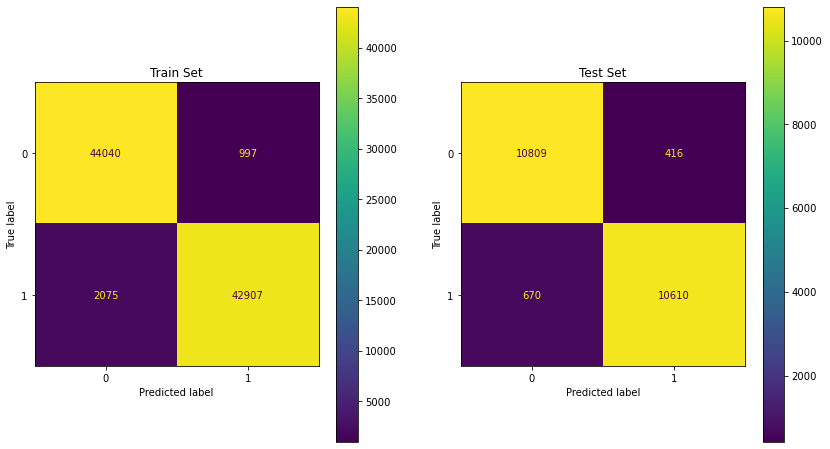

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

model = DecisionTreeClassifier(max_depth=13)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Features Importances

<BarContainer object of 22 artists>

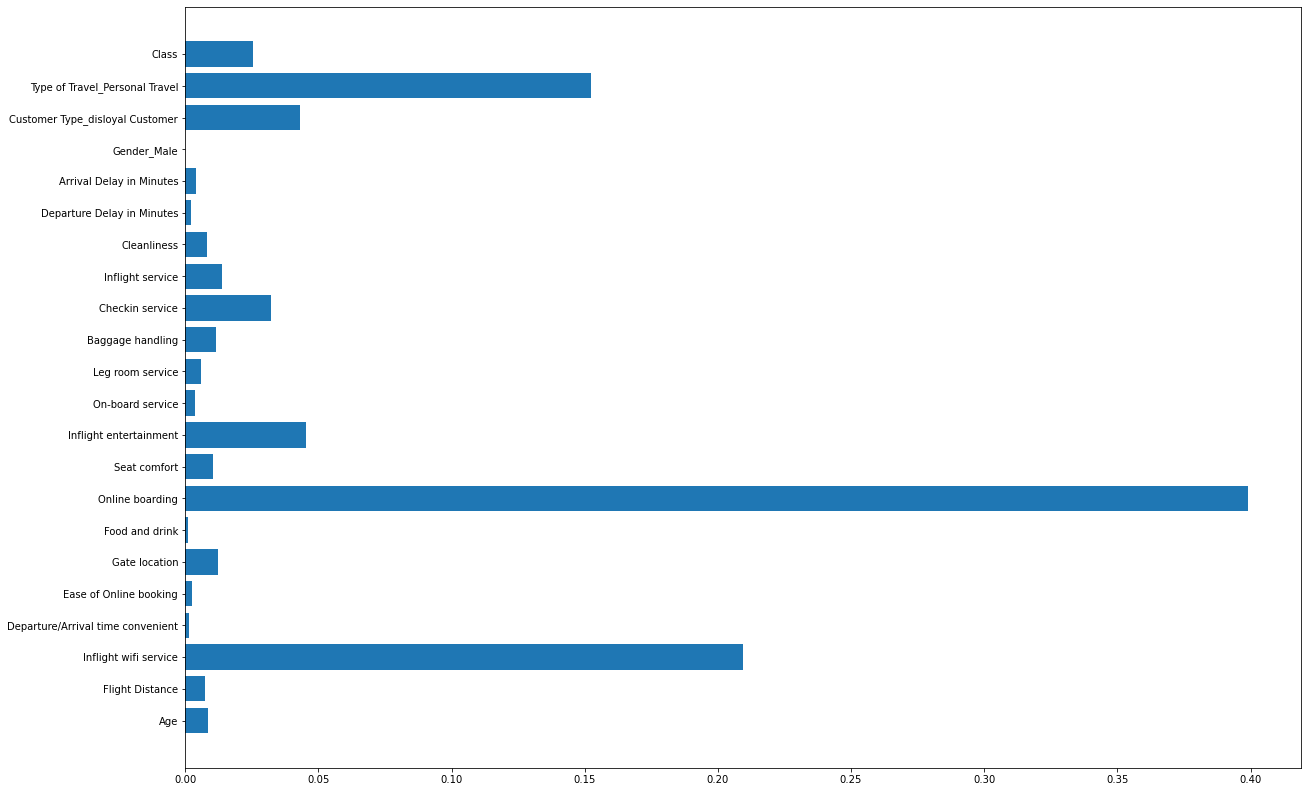

In [32]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

### Random forest Classifier

In [33]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
model4.fit(X_train, y_train)
print("Accuracy of train: ",model4.score(X_train, y_train))
print("Accuracy of test: ",model4.score(X_test, y_test))

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                         bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(model4, X_train, y_train, cv=5)
print(cross_val_scores)


Accuracy of train:  0.9606749686177363
Accuracy of test:  0.9531659631193068
[0.95262164 0.95117752 0.95423239 0.95312153 0.95211909]


### Logistic Regression

In [35]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

,Error_metric,Train,Test
0,Accuracy,0.870327,0.871229
1,Precision,0.880405,0.881903
2,Recall,0.856898,0.857979


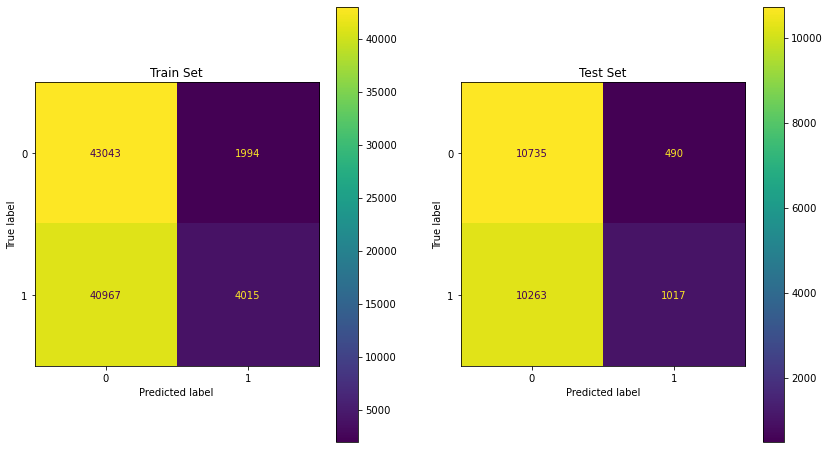

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model2,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model2,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Features Importances

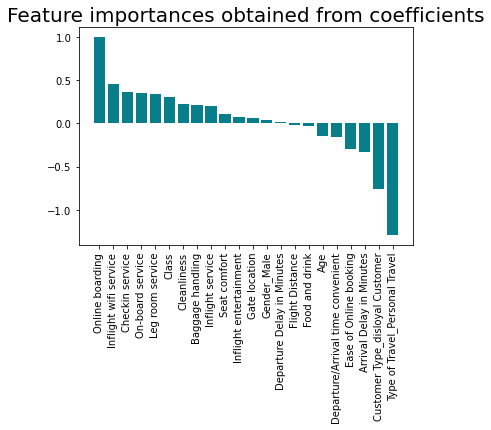

In [37]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model2.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Knn Classifier

In [38]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

#### Scale the data

In [40]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [41]:
X_train.shape

(90019, 22)

In [42]:
X_test_scaled=std_scaler.transform(X_test)

In [43]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 1.16333719 -0.87598592 -1.29994943 ... -0.45694145  1.59042913
  -1.13818927]
 [ 0.89463034 -0.87794857 -0.56963246 ... -0.45694145 -0.62876112
  -1.13818927]
 [-0.04584365 -0.67285071 -0.56963246 ... -0.45694145  1.59042913
  -1.13818927]
 ...
 [-0.58325736 -0.44223828 -0.56963246 ...  2.18846419 -0.62876112
  -1.13818927]
 [ 0.35721663 -1.02024135  0.89100146 ... -0.45694145 -0.62876112
   0.94400757]
 [-1.05349436 -0.2400844   0.1606845  ... -0.45694145  1.59042913
  -1.13818927]]
--------
[[-0.91914093  0.87666856  0.1606845  ... -0.45694145 -0.62876112
   0.94400757]
 [-0.7847875  -0.72780516  1.62131842 ... -0.45694145 -0.62876112
   0.94400757]
 [-2.06114506 -0.10858625  0.89100146 ... -0.45694145  1.59042913
  -1.13818927]
 ...
 [ 0.08850977 -0.36176926  0.1606845  ... -0.45694145 -0.62876112
   0.94400757]
 [ 1.16333719 -0.76803967 -0.56963246 ... -0.45694145  1.59042913
  -1.13818927]
 [ 0.02133306 -0.77294632  0.1606845  ... -0.45694145 -0.62876112
   0.94400757]]


,Error_metric,Train,Test
0,Accuracy,0.947456,0.928727
1,Precision,0.967807,0.951896
2,Recall,0.925637,0.903457


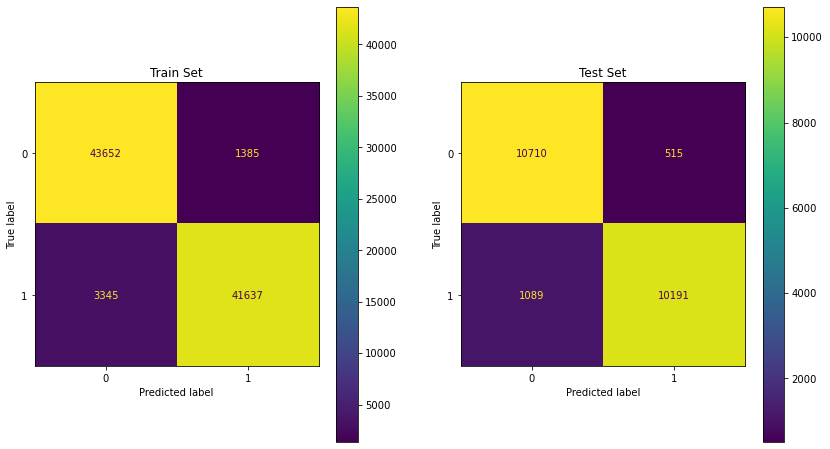

In [50]:
   
model3 = KNeighborsClassifier()
model3.fit(X_train_scaled, y_train)


y_pred_train = model3.predict(X_train_scaled)
y_pred_test = model3.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model3,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model3,X_test_scaled,y_test,ax=ax[1], values_format = 'd')
ax[1].title.set_text("Test Set")

### Models Comparision

In [51]:
model_pipeline = [model,model4, model2, model3]
model_names = ['Decision Tree Classifier', 'Random forest Classifier','Logistic Regression', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree Classifier': 0.733911755283621, 'Random forest Classifier': 0.9526544336713092, 'Logistic Regression': 0.775469854607041, 'KNN Classifier': 0.733911755283621}


## Upsampling (SMOTE)

In [46]:
smote = SMOTE()

In [47]:
data = total
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [48]:
y.value_counts()

0    73225
1    56262
Name: satisfaction, dtype: int64

In [55]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    73225
1    73225
Name: satisfaction, dtype: int64

### Decision Tree Classifier

,Error_metric,Train,Test
0,Accuracy,0.958339,0.959611
1,Precision,0.968603,0.971817
2,Recall,0.947390,0.946664


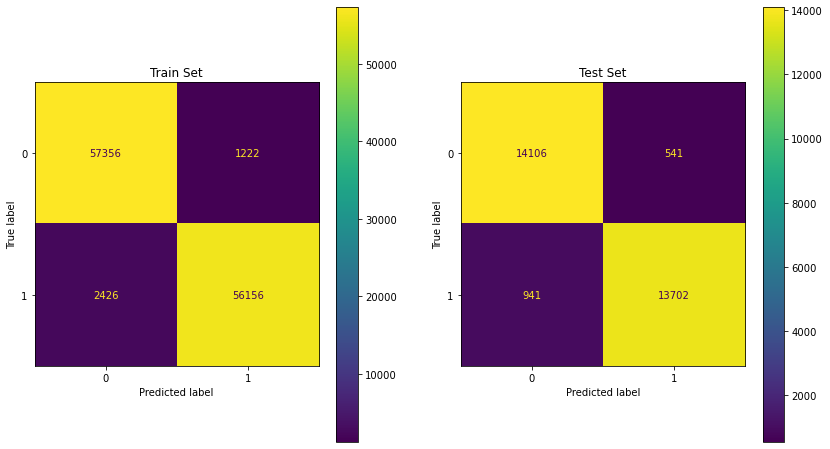

In [67]:
y = y_sm
X = X_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model= DecisionTreeClassifier(max_depth=15)
model.fit(X_train, y_train)

y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Random forest Classifier

In [77]:
y = y_sm
X = X_sm


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

model4 = RandomForestClassifier(max_depth=30,min_samples_leaf=20,max_features=None,n_estimators=250,
                             bootstrap=True,oob_score=True, random_state=0)
model4.fit(X_train, y_train)
print("Accuracy of train: ",model4.score(X_train, y_train))
print("Accuracy of test: ",model4.score(X_test, y_test))

model4 = RandomForestClassifier(max_depth=30,min_samples_leaf=20,max_features=None,n_estimators=250,
                         bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(model4, X_train, y_train, cv=5)
print(cross_val_scores)



KeyboardInterrupt: 

In [ ]:
y = y_sm
X = X_sm


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

model4 = RandomForestClassifier(max_depth=30,min_samples_leaf=20,max_features=None,n_estimators=1000,
                             bootstrap=True,oob_score=True, random_state=0)
model4.fit(X_train, y_train)
print("Accuracy of train: ",model4.score(X_train, y_train))
print("Accuracy of test: ",model4.score(X_test, y_test))

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.872217,0.871082
1,Precision,0.878755,0.874626
2,Recall,0.864062,0.864408


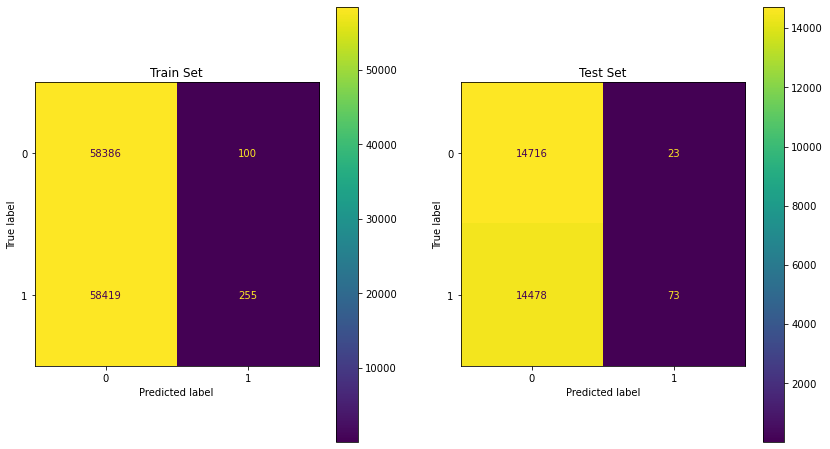

In [79]:
y = y_sm
X = X_sm

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model2,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model2,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


### Knn Classifier

In [ ]:
y = y_sm
X = X_sm

In [ ]:
y.shape